<a href="https://colab.research.google.com/github/miczkejedrzej/MNLP-project-1/blob/main/Data_collection_Photos_for_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import of the training data

from google.colab import files
uploaded = files.upload()

# Import of moduls

!pip install wikidata --quiet

import matplotlib.pyplot as plt
import pandas as pd
from wikidata.client import Client
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import numpy as np

from tqdm.auto import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the data
train_df = pd.read_csv('[MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv', sep='\t')

Saving [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv to [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned (2).tsv


In [22]:
def extract_entity_id(url):
    return url.strip().split("/")[-1]

In [23]:
def get_claims(wikidata_url):
  # Extract the id of the item
    entity_id = extract_entity_id(wikidata_url)

    # Extract information of the item
    client = Client()
    item = client.get(entity_id, load=True)

    # Extract the claims of the item
    claims = item.data.get("claims", {})

    return claims

In [24]:
def get_sitelinks(wikidata_url):
  # Extract the id of the item
    entity_id = extract_entity_id(wikidata_url)

    # Extract information of the item
    client = Client()
    item = client.get(entity_id, load=True)

    # Extract the claims of the item
    sitelinks = item.data.get("sitelinks", {})

    return sitelinks

def get_en_wikipedia_url(wikidata_url):

  sitelinks = get_sitelinks(wikidata_url)

  # Find the english wikidepia page
  enwiki = sitelinks.get("enwiki")

  # Return its URL
  return(enwiki.get("url"))

# Test
wikidata_url = train_df.iloc[0,0]
get_en_wikipedia_url(wikidata_url)

'https://en.wikipedia.org/wiki/Sebasti%C3%A1n_Pi%C3%B1era'

array([[[ 74,  75,  57],
        [ 81,  82,  64],
        [ 81,  84,  65],
        ...,
        [210, 239, 173],
        [205, 232, 163],
        [183, 209, 138]],

       [[ 87,  88,  70],
        [ 97,  98,  80],
        [103, 106,  87],
        ...,
        [112, 142,  78],
        [135, 162,  95],
        [126, 151,  83]],

       [[ 96,  97,  79],
        [107, 108,  90],
        [116, 119, 100],
        ...,
        [ 52,  82,  22],
        [ 79, 105,  44],
        [ 86, 112,  49]],

       ...,

       [[ 14,  18,   1],
        [ 24,  25,   7],
        [ 47,  38,  23],
        ...,
        [ 76,  77,  71],
        [ 84,  84,  76],
        [ 39,  39,  31]],

       [[ 31,  34,  15],
        [ 95,  94,  74],
        [131, 119, 103],
        ...,
        [ 85,  86,  80],
        [ 76,  76,  68],
        [ 18,  18,  10]],

       [[ 60,  63,  42],
        [134, 133, 113],
        [174, 161, 144],
        ...,
        [ 89,  90,  84],
        [ 87,  87,  79],
        [ 25,  25,  17]]], dtype=uint8)
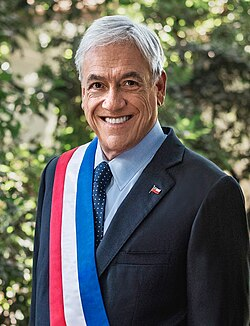

In [27]:
def get_wikipedia_image(wikidata_url):

    # Extractt the english wikipedia page if it exists
    try:
      wikipedia_url = get_en_wikipedia_url(wikidata_url)

    except Exception:
      return None

    # Fighting against the bots protection
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(wikipedia_url, headers=headers)

    # Make sur the response has no error
    if response.status_code == 200:

        # Extract the infobox of the wikipedia page
        soup = BeautifulSoup(response.text, 'html.parser')
        infobox = soup.find('table', {'class': 'infobox'})

        if infobox:
            # Find the image
            img_tag = infobox.find('img')
            if img_tag:
                # Recreate the URL of the image
                img_url = 'https:' + img_tag['src']
                try:
                    img_response = requests.get(img_url, headers=headers)
                    img = Image.open(BytesIO(img_response.content))
                    return np.array(img)
                except:
                    return None
    # If there is an error somewhere, return None
    return None

#Test
get_wikipedia_image(wikidata_url)

As it takes hours to run, when we apply the extraction of the photos on the whole dataset, we slice it, and it runs faster

In [29]:
# Application of the extraction of the photos, for the rows 0:500

# Initialization of the new variable
train_df['image'] = None

# Extraction of the images to the sub dataframe
train_df_subset = train_df[0:500]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[0:500] = train_df_subset

# Visualisation
train_df[0:500]

<ipython-input-29-beaea87961a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
0,http://www.wikidata.org/entity/Q306,Sebastián Piñera,Chilean entrepreneur and politician (1949–2024),entity,politics,politician,cultural exclusive,"[[[74, 75, 57], [81, 82, 64], [81, 84, 65], [7..."
1,http://www.wikidata.org/entity/Q12735,John Amos Comenius,"Czech teacher, educator, philosopher and write...",entity,politics,politician,cultural representative,"[[[39, 37, 22], [35, 33, 18], [34, 32, 17], [3..."
2,http://www.wikidata.org/entity/Q1752,Macrinus,Roman emperor from 217 to 218,entity,politics,politician,cultural representative,"[[[111, 112, 104], [111, 112, 104], [112, 113,..."
3,http://www.wikidata.org/entity/Q1639,Lamine Diack,Senegalese sports manager (1933–2021),entity,politics,politician,cultural representative,"[[[126, 82, 35], [125, 81, 34], [127, 81, 32],..."
4,http://www.wikidata.org/entity/Q9588,Richard Nixon,President of the United States from 1969 to 1974,entity,politics,politician,cultural representative,"[[[107, 89, 77], [107, 89, 77], [104, 86, 74],..."
...,...,...,...,...,...,...,...,...
6246,http://www.wikidata.org/entity/Q321103,Bühl,"quarter of Tübingen, Baden-Württemberg, Germany",entity,geography,neighborhood,cultural exclusive,None
6247,http://www.wikidata.org/entity/Q338167,Tenderloin,area of New York City during the late 19th and...,entity,geography,neighborhood,cultural exclusive,None
6248,http://www.wikidata.org/entity/Q66991,Schinznach-Dorf,former municipality and current district of Sc...,entity,geography,neighborhood,cultural exclusive,None
6249,http://www.wikidata.org/entity/Q66922,Ependes,village and former municipality in Bois-d'Amon...,entity,geography,neighborhood,cultural exclusive,None


In [30]:
train_df['image'].count()

np.int64(193)

In [31]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[500:1000]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[500:1000] = train_df_subset

# Visualisation
train_df[500:1000]

<ipython-input-31-712185269597>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
0,http://www.wikidata.org/entity/Q306,Sebastián Piñera,Chilean entrepreneur and politician (1949–2024),entity,politics,politician,cultural exclusive,"[[[74, 75, 57], [81, 82, 64], [81, 84, 65], [7..."
1,http://www.wikidata.org/entity/Q12735,John Amos Comenius,"Czech teacher, educator, philosopher and write...",entity,politics,politician,cultural representative,"[[[39, 37, 22], [35, 33, 18], [34, 32, 17], [3..."
2,http://www.wikidata.org/entity/Q1752,Macrinus,Roman emperor from 217 to 218,entity,politics,politician,cultural representative,"[[[111, 112, 104], [111, 112, 104], [112, 113,..."
3,http://www.wikidata.org/entity/Q1639,Lamine Diack,Senegalese sports manager (1933–2021),entity,politics,politician,cultural representative,"[[[126, 82, 35], [125, 81, 34], [127, 81, 32],..."
4,http://www.wikidata.org/entity/Q9588,Richard Nixon,President of the United States from 1969 to 1974,entity,politics,politician,cultural representative,"[[[107, 89, 77], [107, 89, 77], [104, 86, 74],..."
...,...,...,...,...,...,...,...,...
6246,http://www.wikidata.org/entity/Q321103,Bühl,"quarter of Tübingen, Baden-Württemberg, Germany",entity,geography,neighborhood,cultural exclusive,None
6247,http://www.wikidata.org/entity/Q338167,Tenderloin,area of New York City during the late 19th and...,entity,geography,neighborhood,cultural exclusive,None
6248,http://www.wikidata.org/entity/Q66991,Schinznach-Dorf,former municipality and current district of Sc...,entity,geography,neighborhood,cultural exclusive,None
6249,http://www.wikidata.org/entity/Q66922,Ependes,village and former municipality in Bois-d'Amon...,entity,geography,neighborhood,cultural exclusive,None


In [32]:
train_df['image'].count()

np.int64(473)

In [33]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[1000:1500]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[1000:1500] = train_df_subset

# Visualisation
train_df[1000:1500]

<ipython-input-33-8f3ddff54d9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
1000,http://www.wikidata.org/entity/Q1896616,Romano-Gothic,architectural style,entity,architecture,architectural style,cultural representative,None
1001,http://www.wikidata.org/entity/Q1810654,Serbo-Byzantine architecture,ecclesiastical architectural style,entity,architecture,architectural style,cultural exclusive,None
1002,http://www.wikidata.org/entity/Q1756718,Rascian architecture,ecclesiastical architectural style that flouri...,entity,architecture,architectural style,cultural exclusive,None
1003,http://www.wikidata.org/entity/Q1882338,Mosan art,regional style of art from the Meuse river valley,entity,architecture,architectural style,cultural exclusive,None
1004,http://www.wikidata.org/entity/Q1788409,Nordic Classicism,architectural style,entity,architecture,architectural style,cultural representative,None
...,...,...,...,...,...,...,...,...
1495,http://www.wikidata.org/entity/Q1161248,Daniel Jocelyn,New Zealand equestrian,entity,sports,athlete,cultural exclusive,None
1496,http://www.wikidata.org/entity/Q1159127,Dan Millman,American self help writer,entity,sports,athlete,cultural representative,None
1497,http://www.wikidata.org/entity/Q26846,Archelaus I of Macedon,king of Macedon,entity,sports,athlete,cultural exclusive,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1498,http://www.wikidata.org/entity/Q18797,Wladimir Klitschko,Ukrainian boxer (born 1976),entity,sports,athlete,cultural representative,"[[[17, 24, 30], [18, 25, 31], [18, 25, 31], [1..."


In [34]:
train_df['image'].count()

np.int64(632)

In [35]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[1500:2000]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[1500:2000] = train_df_subset

# Visualisation
train_df[1500:2000]

<ipython-input-35-37ed1cc176bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
1500,http://www.wikidata.org/entity/Q382478,Milovan Zoričić,Croatian football official and judge (1884–1971),entity,sports,athlete,cultural exclusive,None
1501,http://www.wikidata.org/entity/Q388631,Ivan Hlinka,Czech ice hockey player and coach (1950-2004),entity,sports,athlete,cultural representative,"[[[252, 237, 216], [250, 235, 214], [249, 234,..."
1502,http://www.wikidata.org/entity/Q380407,Nikolai Fomenko,Russian entertainer and businessman,entity,sports,athlete,cultural exclusive,"[[[173, 173, 161], [173, 173, 161], [174, 174,..."
1503,http://www.wikidata.org/entity/Q380115,Michal Bílek,Czech footballer,entity,sports,athlete,cultural exclusive,"[[[32, 29, 32], [31, 28, 31], [29, 26, 30], [2..."
1504,http://www.wikidata.org/entity/Q1435207,Fok Ming Shan,Hong Kong archer,entity,sports,athlete,cultural exclusive,None
...,...,...,...,...,...,...,...,...
1995,http://www.wikidata.org/entity/Q195335,Turkish Policy Quarterly,magazine,entity,media,magazine,cultural representative,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1996,http://www.wikidata.org/entity/Q194839,Sibylle,magazine,entity,media,magazine,cultural representative,"[[0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0,..."
1997,http://www.wikidata.org/entity/Q206478,Za Rulem,Russian automotive magazine,entity,media,magazine,cultural exclusive,"[[[209, 59, 18], [210, 60, 18], [211, 60, 18],..."
1998,http://www.wikidata.org/entity/Q198625,Filologicheskie Zapiski,magazine,entity,media,magazine,cultural exclusive,None


In [36]:
train_df['image'].count()

np.int64(892)

In [37]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[2000:2500]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[2000:2500] = train_df_subset

# Visualisation
train_df[2000:2500]

<ipython-input-37-3e9f7578a884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
2000,http://www.wikidata.org/entity/Q525592,New Scientist,science magazine,entity,media,magazine,cultural agnostic,"[[0, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0,..."
2001,http://www.wikidata.org/entity/Q550399,HP/De Tijd,periodical literature,entity,media,magazine,cultural exclusive,"[[[214, 156, 145], [214, 120, 110], [204, 95, ..."
2002,http://www.wikidata.org/entity/Q541144,Die Schwalbe,German bimonthly magazine specialized on chess...,entity,media,magazine,cultural exclusive,None
2003,http://www.wikidata.org/entity/Q522831,Allgemeine Zeitung des Judentums,magazine,entity,media,magazine,cultural exclusive,None
2004,http://www.wikidata.org/entity/Q544945,Hillman Periodicals,American magazine and comic book publishing co...,entity,media,magazine,cultural exclusive,None
...,...,...,...,...,...,...,...,...
2495,http://www.wikidata.org/entity/Q249542,transdisciplinarity,research strategy that crosses disciplinary bo...,concept,philosophy and religion,philosophical movement,cultural agnostic,None
2496,http://www.wikidata.org/entity/Q76611,nonviolence,principle or practice of not causing harm to o...,concept,philosophy and religion,philosophical movement,cultural agnostic,None
2497,http://www.wikidata.org/entity/Q46699,slavophilia,intellectual movement in Russia opposed to Wes...,concept,philosophy and religion,philosophical movement,cultural exclusive,None
2498,http://www.wikidata.org/entity/Q48420,gnosticism,early Christian and Jewish religious systems,concept,philosophy and religion,philosophical movement,cultural agnostic,None


In [38]:
train_df['image'].count()

np.int64(1091)

In [39]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[2500:3000]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[2500:3000] = train_df_subset

# Visualisation
train_df[2500:3000]

<ipython-input-39-4aa6a55e28c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
2500,http://www.wikidata.org/entity/Q105757842,xinxue,school of Confucianism,entity,philosophy and religion,philosophical movement,cultural exclusive,None
2501,http://www.wikidata.org/entity/Q55603881,analytic theology,application of analytic philosophy to theology,entity,philosophy and religion,philosophical movement,cultural agnostic,None
2502,http://www.wikidata.org/entity/Q109609611,theistic naturalism,worldview that rejects divine intervention whi...,entity,philosophy and religion,philosophical movement,cultural agnostic,None
2503,http://www.wikidata.org/entity/Q56316799,xenofeminism,feminist movement that promotes the overcoming...,entity,philosophy and religion,philosophical movement,cultural agnostic,None
2504,http://www.wikidata.org/entity/Q55639561,Death-positive movement,social and philosophical movement that encoura...,entity,philosophy and religion,philosophical movement,cultural agnostic,None
...,...,...,...,...,...,...,...,...
2995,http://www.wikidata.org/entity/Q260617,Marlene Dumas,South African painter and draftsperson,entity,visual arts,artist,cultural representative,"[[[80, 72, 59], [78, 70, 57], [74, 68, 56], [7..."
2996,http://www.wikidata.org/entity/Q214687,Else Meidner,German painter (1901-1987),entity,visual arts,artist,cultural exclusive,"[[223, 229, 237, 239, 237, 236, 238, 240, 239,..."
2997,http://www.wikidata.org/entity/Q214957,Thomas Nast,American cartoonist (1840–1902),entity,visual arts,artist,cultural representative,"[[[197, 182, 149], [196, 181, 148], [195, 180,..."
2998,http://www.wikidata.org/entity/Q214565,Beatrix Potter,British children's writer and illustrator (186...,entity,visual arts,artist,cultural representative,"[[[27, 28, 12], [52, 39, 46], [39, 31, 29], [3..."


In [40]:
train_df['image'].count()

np.int64(1257)

In [41]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[3000:3500]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[3000:3500] = train_df_subset

# Visualisation
train_df[3000:3500]

<ipython-input-41-f9ba30fe9c68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
3000,http://www.wikidata.org/entity/Q152176,Paul Éluard,French poet (1895–1952),entity,visual arts,artist,cultural representative,"[[59, 63, 63, 64, 69, 68, 66, 68, 66, 65, 65, ..."
3001,http://www.wikidata.org/entity/Q213917,Gerd Arntz,German artist (1900-1988),entity,visual arts,artist,cultural representative,"[[213, 216, 220, 221, 221, 223, 226, 229, 231,..."
3002,http://www.wikidata.org/entity/Q213735,Charlotte Salomon,German-Jewish artist and Holocaust victim (191...,entity,visual arts,artist,cultural representative,"[[174, 172, 168, 172, 175, 180, 189, 182, 214,..."
3003,http://www.wikidata.org/entity/Q213876,Carl-Alexander von Volborth,German heraldic artist (1909-2009),entity,visual arts,artist,cultural exclusive,None
3004,http://www.wikidata.org/entity/Q214381,Lucia Moholy,Czech photographer (1894–1989),entity,visual arts,artist,cultural exclusive,"[[45, 45, 45, 45, 45, 45, 45, 45, 46, 48, 51, ..."
...,...,...,...,...,...,...,...,...
3495,http://www.wikidata.org/entity/Q15276542,African wax print,wax-resist (batik) printed textile of Africa,concept,fashion,textile,cultural representative,None
3496,http://www.wikidata.org/entity/Q696265,mosquito net,fine net used to exclude mosquitos and other b...,concept,fashion,textile,cultural agnostic,None
3497,http://www.wikidata.org/entity/Q652698,denim,sturdy cotton or cotton-blend twill textile,concept,fashion,textile,cultural representative,None
3498,http://www.wikidata.org/entity/Q635427,batik,Indonesian cloth dyeing technique originating ...,concept,fashion,textile,cultural representative,"[[[245, 243, 248], [244, 242, 245], [245, 243,..."


In [42]:
train_df['image'].count()

np.int64(1422)

In [ ]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[3500:4000]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[3500:4000] = train_df_subset

# Visualisation
train_df[3500:4000]

<ipython-input-82-de38753cf64e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
3500,http://www.wikidata.org/entity/Q638703,nonwoven fabric,sheet of fibers,concept,fashion,textile,cultural agnostic,None
3501,http://www.wikidata.org/entity/Q572813,worsted,yarn spun with average to hard twist from long...,concept,fashion,textile,cultural agnostic,None
3502,http://www.wikidata.org/entity/Q391788,bed sheet,rectangular piece of cloth or linen cotton use...,concept,fashion,textile,cultural agnostic,None
3503,http://www.wikidata.org/entity/Q504825,net,textile in which the warp and weft yarns are l...,concept,fashion,textile,cultural agnostic,None
3504,http://www.wikidata.org/entity/Q231250,lace,"openwork fabric, patterned with open holes in ...",concept,fashion,textile,cultural agnostic,None
...,...,...,...,...,...,...,...,...
3995,http://www.wikidata.org/entity/Q126606,Bernard Archard,British actor (1916-2008),entity,performing arts,theatrical director,cultural exclusive,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3996,http://www.wikidata.org/entity/Q124966,Marco Tempest,Swiss magician,entity,performing arts,theatrical director,cultural representative,None
3997,http://www.wikidata.org/entity/Q124918,Jakob Streit,"Swiss teacher, writer, musician and dramaturg ...",entity,performing arts,theatrical director,cultural exclusive,None
3998,http://www.wikidata.org/entity/Q129301,Stanisław Łapiński,actor (1895-1972),entity,performing arts,theatrical director,cultural exclusive,None


In [43]:
train_df['image'].count()

np.int64(1422)

In [44]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[4000:4500]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[4000:4500] = train_df_subset

# Visualisation
train_df[4000:4500]

<ipython-input-44-f6e534437b1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
4000,http://www.wikidata.org/entity/Q853,Andrei Tarkovsky,"Soviet and Russian film director, screenwriter...",entity,performing arts,theatrical director,cultural representative,"[[[0, 0, 5], [2, 3, 8], [0, 0, 4], [0, 0, 2], ..."
4001,http://www.wikidata.org/entity/Q78934,Walter Felsenstein,Austrian theatre director (1901–1975),entity,performing arts,theatrical director,cultural exclusive,None
4002,http://www.wikidata.org/entity/Q60750837,intimacy coordinator,staff member who supports actors in sex scenes,concept,performing arts,choreographer,cultural agnostic,None
4003,http://www.wikidata.org/entity/Q805253,ballet master,person responsible for teaching daily ballet c...,concept,performing arts,choreographer,cultural representative,None
4004,http://www.wikidata.org/entity/Q561048,Antonio Gades,Spanish dancer (1936-2004),entity,performing arts,choreographer,cultural representative,"[[[179, 165, 154], [180, 163, 153], [135, 119,..."
...,...,...,...,...,...,...,...,...
4495,http://www.wikidata.org/entity/Q25303529,Road to Ultra,event created and founded by the team behind t...,concept,music,music festival,cultural agnostic,"[[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, ..."
4496,http://www.wikidata.org/entity/Q3070358,Vieilles Charrues Festival,"music festival held yearly in Brittany, France",concept,music,music festival,cultural exclusive,None
4497,http://www.wikidata.org/entity/Q1758841,A Campingflight to Lowlands Paradise,music festival in Netherlands,concept,music,music festival,cultural exclusive,"[[[111, 126, 147], [114, 129, 150], [115, 131,..."
4498,http://www.wikidata.org/entity/Q705863,Art on Ice,music festival and ice show,concept,music,music festival,cultural exclusive,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [45]:
train_df['image'].count()

np.int64(1630)

In [46]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[4500:5000]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[4500:5000] = train_df_subset

# Visualisation
train_df[4500:5000]

<ipython-input-46-9be3b9577dbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
4500,http://www.wikidata.org/entity/Q60723829,pop singer,singer who sings pop songs,entity,music,musical profession,cultural agnostic,None
4501,http://www.wikidata.org/entity/Q51844772,shamisen player,musician who plays the shamisen,entity,music,musical profession,cultural representative,None
4502,http://www.wikidata.org/entity/Q18749693,carillonist,musician who plays the carillon,entity,music,musical profession,cultural exclusive,None
4503,http://www.wikidata.org/entity/Q20850090,harmonicist,person who plays a harmonica,entity,music,musical profession,cultural agnostic,"[[[186, 175, 171], [173, 162, 158], [180, 169,..."
4504,http://www.wikidata.org/entity/Q20791985,bandoneonist,musician who plays bandoneon,entity,music,musical profession,cultural representative,"[[[26, 25, 20], [26, 25, 20], [26, 25, 20], [2..."
...,...,...,...,...,...,...,...,...
4995,http://www.wikidata.org/entity/Q71763,Alexander Graf Lambsdorff,German diplomat and politician,entity,history,historian,cultural exclusive,"[[[51, 1, 0], [51, 1, 0], [51, 1, 0], [51, 1, ..."
4996,http://www.wikidata.org/entity/Q71732,Jörg Friedrich,German author and historian (1944-),entity,history,historian,cultural exclusive,None
4997,http://www.wikidata.org/entity/Q71737,Władysław Pobóg-Malinowski,Polish historian (1899–1962),entity,history,historian,cultural exclusive,None
4998,http://www.wikidata.org/entity/Q71951,Albert Hauf,Spanish philologist,entity,history,historian,cultural exclusive,None


In [47]:
train_df['image'].count()

np.int64(1862)

In [48]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[5000:5500]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[5000:5500] = train_df_subset

# Visualisation
train_df[5000:5500]

<ipython-input-48-5d562244eefa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
5000,http://www.wikidata.org/entity/Q34787,Friedrich Engels,"German philosopher, sociologist and economist ...",entity,history,historian,cultural representative,"[[145, 143, 158, 149, 138, 148, 148, 146, 148,..."
5001,http://www.wikidata.org/entity/Q58040,Andre Gunder Frank,German-American economic historian and sociolo...,entity,history,historian,cultural agnostic,None
5002,http://www.wikidata.org/entity/Q58051,Ernst Hanfstaengl,"Nazi businessman, art dealer (1887-1975)",entity,history,historian,cultural exclusive,"[[251, 251, 251, 251, 251, 251, 251, 251, 251,..."
5003,http://www.wikidata.org/entity/Q58115,Uri Rosenthal,Dutch former politician,entity,history,historian,cultural exclusive,"[[[95, 97, 96], [95, 97, 96], [95, 97, 96], [9..."
5004,http://www.wikidata.org/entity/Q58121,Erkki Tuomioja,Finnish politician,entity,history,historian,cultural exclusive,"[[[206, 208, 205], [214, 216, 213], [210, 212,..."
...,...,...,...,...,...,...,...,...
5495,http://www.wikidata.org/entity/Q11955723,Communal meal,meal eaten by a group of people,concept,gestures and habits,tradition,cultural agnostic,None
5496,http://www.wikidata.org/entity/Q7404848,Salish weaving,traditional textile techniques of the Coast Sa...,concept,gestures and habits,tradition,cultural exclusive,None
5497,http://www.wikidata.org/entity/Q4400843,Russian wedding traditions,explains the Russian wedding culture,concept,gestures and habits,tradition,cultural representative,None
5498,http://www.wikidata.org/entity/Q5433392,family tradition,"aggregate of attitudes, ideas and ideals, and ...",concept,gestures and habits,tradition,cultural agnostic,None


In [49]:
train_df['image'].count()

np.int64(2021)

In [50]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[5500:6000]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[5500:6000] = train_df_subset

# Visualisation
train_df[5500:6000]

<ipython-input-50-6845125db32e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
5500,http://www.wikidata.org/entity/Q5153956,communal dining,practice of dining with others,concept,gestures and habits,tradition,cultural agnostic,None
5501,http://www.wikidata.org/entity/Q4823773,Australian Aboriginal avoidance practices,relationships in traditional Aboriginal societ...,concept,gestures and habits,tradition,cultural exclusive,None
5502,http://www.wikidata.org/entity/Q5547841,Georgia Tech traditions,Aspect of Georgia Tech culture,concept,gestures and habits,tradition,cultural exclusive,None
5503,http://www.wikidata.org/entity/Q5110396,Christian tradition,practices or beliefs associated with Christianity,concept,gestures and habits,tradition,cultural agnostic,None
5504,http://www.wikidata.org/entity/Q5134394,clipping the church,ancient custom,concept,gestures and habits,tradition,cultural exclusive,None
...,...,...,...,...,...,...,...,...
5995,http://www.wikidata.org/entity/Q1320721,Munro,"Scottish peak over 3,000 ft",concept,geography,mountain,cultural exclusive,None
5996,http://www.wikidata.org/entity/Q1595289,sacred mountain,mountain venerated as deitiy or used as place ...,concept,geography,mountain,cultural agnostic,None
5997,http://www.wikidata.org/entity/Q1368970,volcanic cone,landform of ejecta from a volcanic vent piled ...,concept,geography,mountain,cultural agnostic,None
5998,http://www.wikidata.org/entity/Q1297565,Puy,"term for a volcanic hill in Auvergne, France",concept,geography,mountain,cultural exclusive,None


In [51]:
train_df['image'].count()

np.int64(2212)

In [52]:
# Extraction of the images to the sub dataframe
train_df_subset = train_df[6000:]
train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))

# Plug in the training dataset
train_df[6000:] = train_df_subset

# Visualisation
train_df[6000:]

<ipython-input-52-4038a975553d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_subset['image'] = train_df_subset['item'].apply(lambda x: get_wikipedia_image(x))


,item,name,description,type,category,subcategory,label,image
6000,http://www.wikidata.org/entity/Q1139493,inselberg,"isolated rock hill, knob, ridge, or small moun...",concept,geography,mountain,cultural agnostic,None
6001,http://www.wikidata.org/entity/Q623319,mesa,elevated area of land with a flat top and side...,concept,geography,mountain,cultural agnostic,None
6002,http://www.wikidata.org/entity/Q1242936,double summit,mountain or hill with two adjacent summits of ...,concept,geography,mountain,cultural agnostic,None
6003,http://www.wikidata.org/entity/Q59647,Abitibi River,"tributary of the Moose River, in northeastern ...",entity,geography,river,cultural exclusive,"[[[180, 176, 177], [182, 178, 179], [184, 182,..."
6004,http://www.wikidata.org/entity/Q57256,Gaoping River,river in Soutnern Taiwan,entity,geography,river,cultural exclusive,"[[[177, 162, 139], [178, 163, 140], [180, 165,..."
...,...,...,...,...,...,...,...,...
6246,http://www.wikidata.org/entity/Q321103,Bühl,"quarter of Tübingen, Baden-Württemberg, Germany",entity,geography,neighborhood,cultural exclusive,None
6247,http://www.wikidata.org/entity/Q338167,Tenderloin,area of New York City during the late 19th and...,entity,geography,neighborhood,cultural exclusive,None
6248,http://www.wikidata.org/entity/Q66991,Schinznach-Dorf,former municipality and current district of Sc...,entity,geography,neighborhood,cultural exclusive,"[[[59, 116, 223], [58, 115, 222], [58, 115, 22..."
6249,http://www.wikidata.org/entity/Q66922,Ependes,village and former municipality in Bois-d'Amon...,entity,geography,neighborhood,cultural exclusive,"[[[66, 65, 26, 253], [146, 139, 37, 255], [147..."


In [53]:
train_df['image'].count()

np.int64(2338)

In [54]:
train_df.to_csv('train_df_images.csv', index=False)

In [55]:
from google.colab import files
files.download('train_df_images.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>